In [1]:
import sys
sys.path.append('../../')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

import plots
from packages import general, bh

In [2]:
np.random.seed(0)

num_particles = 1000

theta = 0.5
terms = 4

n_crits = np.arange(2, 11, dtype=int)

particles = [general.Particle(mass_like=True) for _ in range(num_particles)]

pair_method = general.Pairwise(particles)
bh_CoMs = [bh.BH(particles, theta, 0, n_crit) for n_crit in n_crits]
bh_multis = [bh.BH(particles, theta, terms, n_crit) for n_crit in n_crits]

In [3]:
pair_method.do_method()
pair_pot = np.array([p.potential for p in particles])
pair_force = np.array([p.force_per for p in particles])

CoM_pots = []
CoM_forces = []
multi_pots = []
multi_forces = []

for c in bh_CoMs:
    c.do_method()
    CoM_pots.append(np.array([p.potential for p in particles]))
    CoM_forces.append(np.array([p.force_per for p in particles]))
for m in bh_multis:
    m.do_method()
    multi_pots.append(np.array([p.potential for p in particles]))
    multi_forces.append(np.array([p.force_per for p in particles]))

In [4]:
# fractional errors in potentials
CoM_pots_fracs = [abs((pot - pair_pot) / pair_pot) for pot in CoM_pots]
multi_pots_fracs = [abs((pot - pair_pot) / pair_pot) for pot in multi_pots]

# magnitudes and angles of forces
pair_force_mag     = np.linalg.norm(pair_force, axis=1)
pair_force_angle   = np.arctan2(pair_force[:,1], pair_force[:,0])
CoM_forces_mag = [np.linalg.norm(force, axis=1) for force in CoM_forces]
CoM_forces_angle = [np.arctan2(force[:,1], force[:,0]) for force in CoM_forces]
multi_forces_mag = [np.linalg.norm(force, axis=1) for force in multi_forces]
multi_forces_angle = [np.arctan2(force[:,1], force[:,0]) for force in multi_forces]

# fractional errors in force magnitudes
CoM_forces_mag_frac = [abs((force_mag - pair_force_mag) / pair_force_mag) for force_mag in CoM_forces_mag]
multi_forces_mag_frac = [abs((force_mag - pair_force_mag) / pair_force_mag) for force_mag in multi_forces_mag]

# fractional errors in forces angles
# smallest angluar difference between over 2pi
CoM_forces_angle_frac = []
for force_angle in CoM_forces_angle:
    delta = abs(force_angle - pair_force_angle) % (2*np.pi)
    CoM_forces_angle_frac.append(np.minimum(delta, 2*np.pi - delta) / 2*np.pi)
multi_forces_angle_frac = []
for force_angle in multi_forces_angle:
    delta = abs(force_angle - pair_force_angle) % (2*np.pi)
    multi_forces_angle_frac.append(np.minimum(delta, 2*np.pi - delta) / 2*np.pi)

In [5]:
# CoM
data_CoM_pots = CoM_pots_fracs
data_CoM_mag = CoM_forces_mag_frac
data_CoM_angle = CoM_forces_angle_frac

# multi
data_multi_pots = multi_pots_fracs
data_multi_mag = multi_forces_mag_frac
data_multi_angle = multi_forces_angle_frac

x_labels = n_crits

FILE_PATH = 'error_data/n_crit.npz'
np.savez(FILE_PATH,
    num_particles=num_particles,
    theta=theta,
    terms=terms,
    data_CoM_pots=data_CoM_pots,
    data_CoM_mag=data_CoM_mag,
    data_CoM_angle=data_CoM_angle,
    data_multi_pots=data_multi_pots,
    data_multi_mag=data_multi_mag,
    data_multi_angle=data_multi_angle,
    x_labels=x_labels
)

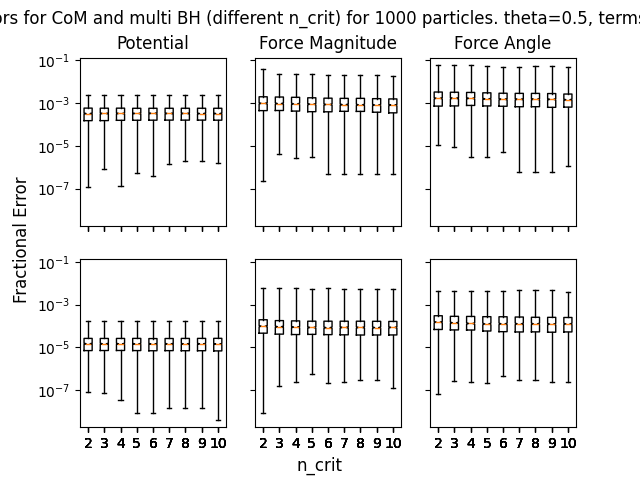

In [5]:
FILE_PATH = 'error_data/n_crit.npz'
fig = plots.n_crit(FILE_PATH)

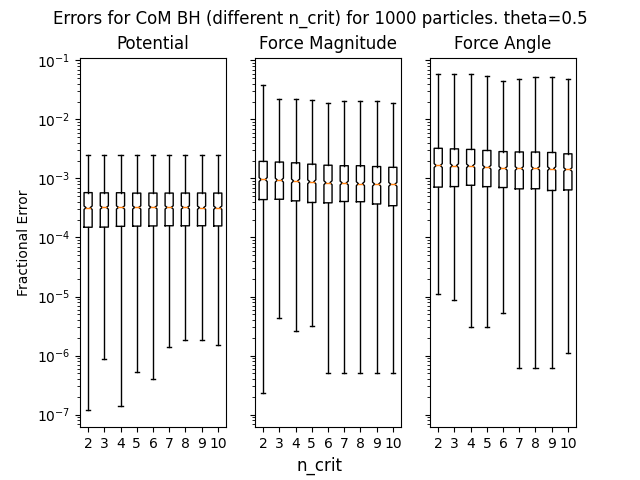

In [10]:
# plot CoM

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey='all')

x_labels = n_crits

ax1.boxplot(data_CoM_pots,  notch=True, whis=(0,100))
ax2.boxplot(data_CoM_mag,   notch=True, whis=(0,100))
ax3.boxplot(data_CoM_angle, notch=True, whis=(0,100))

fig.suptitle(f'Errors for CoM BH (different n_crit) for {num_particles} particles. theta={theta}')
fig.supxlabel('n_crit')

ax1.set_yscale('log')
ax1.set_ylabel('Fractional Error')
ax1.set_xticklabels(x_labels)
ax2.set_xticklabels(x_labels)
ax3.set_xticklabels(x_labels)
ax1.set_title('Potential')
ax2.set_title('Force Magnitude')
ax3.set_title('Force Angle');

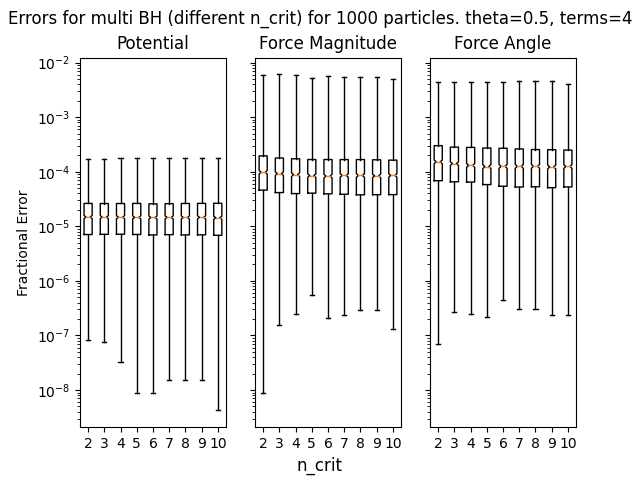

In [11]:
# plot fmm

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey='all')

x_labels = n_crits

ax1.boxplot(data_multi_pots,  notch=True, whis=(0,100))
ax2.boxplot(data_multi_mag,   notch=True, whis=(0,100))
ax3.boxplot(data_multi_angle, notch=True, whis=(0,100))

fig.suptitle(f'Errors for multi BH (different n_crit) for {num_particles} particles. theta={theta}, terms={terms}')
fig.supxlabel('n_crit')

ax1.set_yscale('log')
ax1.set_ylabel('Fractional Error')
ax1.set_xticklabels(x_labels)
ax2.set_xticklabels(x_labels)
ax3.set_xticklabels(x_labels)
ax1.set_title('Potential')
ax2.set_title('Force Magnitude')
ax3.set_title('Force Angle');